# Ford GoBike System Data Exploration
## by Faith Ugwu

## Introduction
> Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. It is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. In June 2017 the system was officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was renamed to Bay Wheels in June 2019. ([Source](https://en.wikipedia.org/wiki/Bay_Wheels))

>This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in February, 2019.

## Preliminary Wrangling
### Data Gathering and Assessing

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the bike dataset
bike = pd.read_csv('201902-fordgobike-tripdata.csv')

# view the shape and first 10 rows of dataset
print(bike.shape)
bike.head(10)

(183412, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


**This dataset contains 183412 rows and 16 columns.**

In [3]:
# checking the dataset information
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

From the above info, we can make the following points:
+ The `start_time` and `end_time` columns have to be converted to pandas DateTime object for proper analysis.
+ Convert `start_station_id`, `end_station_id` and `bike_id` columns to `str`.
+ Convert `user_type`, `member_gender`,  and `bike_share_for_all_trip` columns to `category`.
+ Convert `member_birth_year` column to `int`.

Let's explore futher to see if there are duplicate rows and null values in our dataset.

In [4]:
# number of duplicate rows in bike
bike.duplicated().sum()

0

In [5]:
# columns with missing values
bike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

There are no duplicates, be we have null values in six columns, and we will drop them in the data cleaning phase.

In [6]:
# checking the summary statistics of bike
bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
# checking for unique values in user_type
bike.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

In [8]:
# checking for unique values in member_gender
bike.member_gender.unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

In [9]:
# checking for unique values in bike_share
bike.bike_share_for_all_trip.unique()

array(['No', 'Yes'], dtype=object)

### Data Cleaning
Before cleaning, I will make a copy of the original data for reference purposes.

In [10]:
# make a copy of the dataset
bike_clean = bike.copy()

In [11]:
# Remove rows where member_gender is null
bike_clean = bike[bike['member_gender'].isnull() == False]

# confirm changes
bike_clean.isnull().sum()

duration_sec                 0
start_time                   0
end_time                     0
start_station_id           195
start_station_name         195
start_station_latitude       0
start_station_longitude      0
end_station_id             195
end_station_name           195
end_station_latitude         0
end_station_longitude        0
bike_id                      0
user_type                    0
member_birth_year            0
member_gender                0
bike_share_for_all_trip      0
dtype: int64

In [12]:
# Remove rows where station_id is null
bike_clean = bike_clean[bike_clean['start_station_id'].isnull() == False]

# confirm changes
bike_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [13]:
# convert column datatypes
bike_clean.start_station_id = bike_clean.start_station_id.astype(str)
bike_clean.end_station_id = bike_clean.end_station_id.astype(str)
bike_clean.bike_id = bike_clean.bike_id.astype(str)

bike_clean.start_time = pd.to_datetime(bike_clean.start_time)
bike_clean.end_time = pd.to_datetime(bike_clean.end_time)

bike_clean.user_type = bike_clean.user_type.astype('category')
bike_clean.member_gender = bike_clean.member_gender.astype('category')
bike_clean.bike_share_for_all_trip = bike_clean.bike_share_for_all_trip.astype('category')

bike_clean.member_birth_year = bike_clean.member_birth_year.astype(int)

# confirm changes
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [14]:
# view the shape and first five rows of clean dataset
print(bike_clean.shape)
bike_clean.head()

(174952, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No


In [15]:
# convert the duration_sec column to minutes for better analysis
# split the start time column into date, day, and hour
# add new columns for duration in minutes, start date in yyyy-mm-dd format, start hour of the day, and day of week.

bike_clean['duration_min'] = bike_clean['duration_sec']/60
bike_clean['start_date'] = bike_clean.start_time.dt.strftime('%Y-%m-%d')
bike_clean['start_day'] = bike_clean.start_time.dt.strftime('%A')
bike_clean['start_hour'] = bike_clean.start_time.dt.strftime('%H')

# confirm changes
print(bike_clean.shape)
bike_clean.head()

(174952, 20)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,start_date,start_day,start_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,869.750000,2019-02-28,Thursday,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,1030.900000,2019-02-28,Thursday,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,608.166667,2019-02-28,Thursday,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,26.416667,2019-02-28,Thursday,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,29.883333,2019-02-28,Thursday,23


In [16]:
# view info
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [17]:
bike_clean.start_day.unique()

array(['Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday', 'Saturday',
       'Friday'], dtype=object)

In [18]:
# change datatype of newly created columns
bike_clean.start_date = pd.to_datetime(bike_clean.start_date)
bike_clean.start_hour = bike_clean.start_hour.astype(int)

# convert start_day into ordered categorical type
weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
bike_clean['start_day'] = bike_clean['start_day'].astype(ordered_weekdays)

# confirm changes
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [19]:
# descriptive statistics for numeric variables
bike_clean.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,duration_min,start_hour
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,37.771220,-122.351760,37.771414,-122.351335,1984.803135,11.733379,13.456165
std,1642.204905,0.100391,0.117732,0.100295,0.117294,10.118731,27.370082,4.734282
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000,1.016667,0.000000
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,1980.000000,5.383333,9.000000
50%,510.000000,37.780760,-122.398279,37.781010,-122.397437,1987.000000,8.500000,14.000000
75%,789.000000,37.797320,-122.283093,37.797673,-122.286533,1992.000000,13.150000,17.000000
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,1409.133333,23.000000


### What is the structure of your dataset?

> There are 183412 number of individual rides in the original dataset. The features include: 
> + duration_sec - the bike total duration in seconds
> + start_time - includes the date and time an individual started a trip
> + end_time - includes the date and time an individual ended a trip
> + start_station_id - the id of the station where the trip started
> + end_station_id - the id of the station where the trip ended
> + start_station_name - the name of the station where the trip started
> + end_station_name - the name of the station where the trip ended
> + start_station_latitude
> + end_station_latitude
> + start_station_longitude
> + end_station_longitude
> + bike_id - the id of a given bike
> + user_type - the type of user (customer , subscriber)
> + member_gender - the gender of an individual (male, female, other)
> + member_birth_year
> + bike_share_for_all_trip

> I further enhanced the dataset with features for additional analysis
   > + duration_min
   > + start_date
   > + start_day
   > + start_hour

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest are:
   > + duration_sec - To determine the length of the longest and shortest trips
   > + start_time - To determine the most popular times of day, and days of the week for bike trips.
   > + user_type - To discover the differences in bike usage between subscribers and customers.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The following features will help in my investigation:
  >  + duration_min
  >  + start_date
  >  + start_day
  >  + start_hour
  >  + member_gender
  >  + bike_share_for_all_trip

## Univariate Exploration
I'll start by looking at the distribution of the main variable of interest: duration_sec, which I converted to minutes (duration_min).

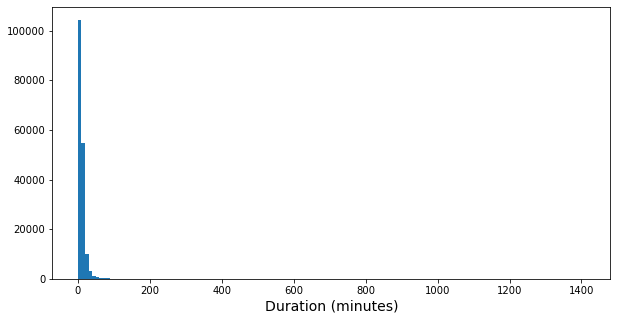

In [20]:
# start with a standard-scaled plot
binsize = 10
bins = np.arange(0, bike_clean['duration_min'].max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = bike_clean, x = 'duration_min', bins = bins)
plt.xlabel('Duration (minutes)', fontsize = 14)
plt.show()

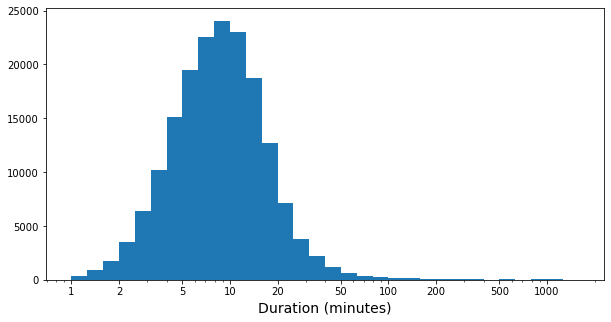

In [21]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.1
bins = 10 ** np.arange(0.0, np.log10(bike_clean['duration_min'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = bike_clean, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000])
plt.xlabel('Duration (minutes)', fontsize = 14)
plt.show()

Duration has a long-tailed distribution, with a lot of bike rides on the lower minute duration, and few on the higher minutes duration. When plotted on a log-scale, the distribution is symmetric and unimodal, with most rides between 8-12 minutes, and very few rides lasting more then 60 minutes.

Next up, the first predictor variable of interest: start_hour.

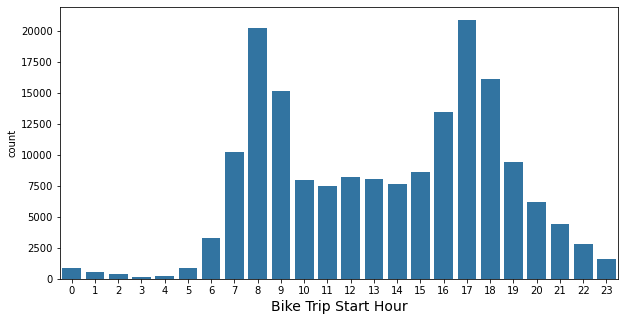

In [22]:
# make a count plot of start_hour
plt.figure(figsize=[10, 5])
default_color = sb.color_palette()[0]
sb.countplot(data = bike_clean, x = 'start_hour', color = default_color)
plt.xlabel('Bike Trip Start Hour', fontsize = 14)
plt.show();

A count plot can be thought of as a histogram, hence from the above visualization, the distribution is seen to be bimodal, with one peak at 8 and the second peak at 17. This means that most rides occur at 8:00am and 5:00pm. This could be due to the fact that most work days begin and end around this time.

Next up, start_day

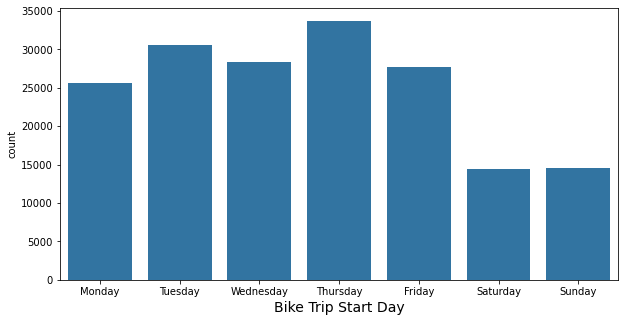

In [23]:
# make a count plot of start_day
plt.figure(figsize=[10, 5])
default_color = sb.color_palette()[0]
sb.countplot(data = bike_clean, x = 'start_day', color = default_color)
plt.xlabel('Bike Trip Start Day', fontsize = 14)
plt.show();

The above plot shows that bikes were mostly used on work days (Monday-Friday) with Thursday having the most bike trips.

Next up, start_date

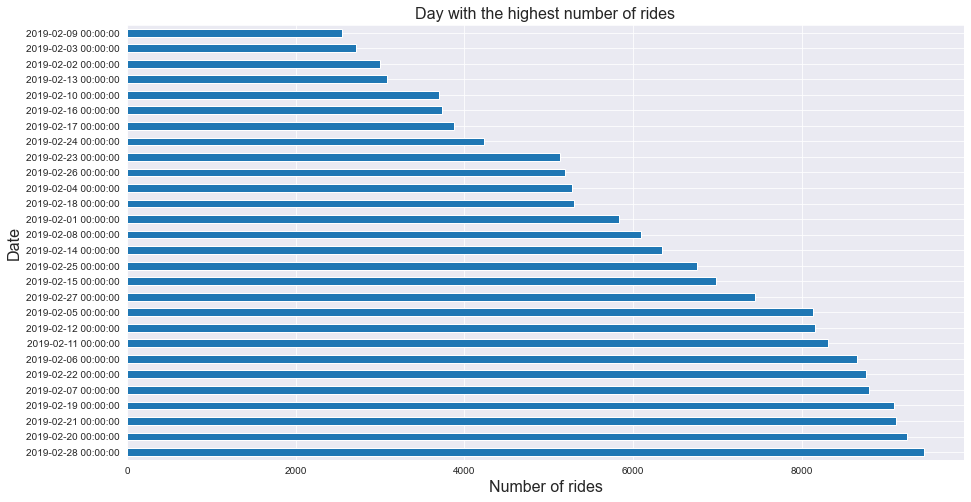

In [24]:
# make a count for each start_date column
total_start_date = bike_clean.start_date.value_counts()

# make a bar plot of the total_start_date
sb.set_style('darkgrid')
total_start_date.plot(kind = 'barh', figsize=(15,8))

# setup the axis and title label
plt.title("Day with the highest number of rides", fontsize = 16)
plt.xlabel("Number of rides", fontsize = 16)
plt.ylabel("Date", fontsize = 16)
plt.show();

From the above plot, the highest number of rides was on February 28, 2019. This date happened to be a Thursday and from our previous plot, Thursday had the most bike trips.

Next up, member_gender

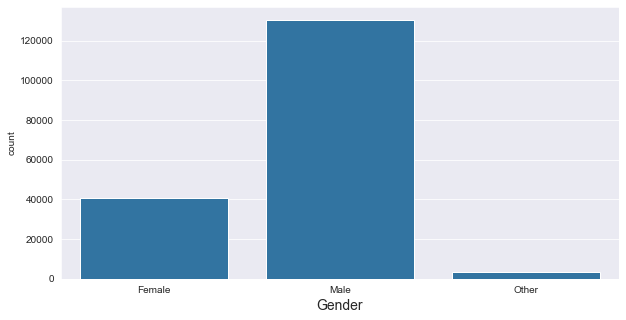

In [25]:
# make a count plot of member_gender
plt.figure(figsize=[10, 5])
default_color = sb.color_palette()[0]
sb.countplot(data = bike_clean, x = 'member_gender', color = default_color)
plt.xlabel('Gender', fontsize = 14)
plt.show();

From the above plot, male bike riders are about 3 times of female bike riders.

Next up, user_type

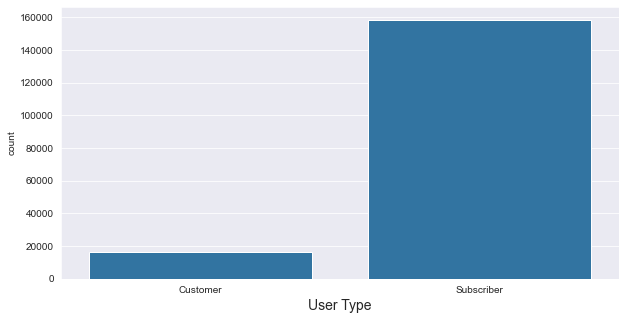

In [26]:
# make a count plot of user_type
plt.figure(figsize=[10, 5])
default_color = sb.color_palette()[0]
sb.countplot(data = bike_clean, x = 'user_type', color = default_color)
plt.xlabel('User Type', fontsize = 14)
plt.show();

From the above plot, subscribers are more than customers. Let's have a look at the percentage difference.

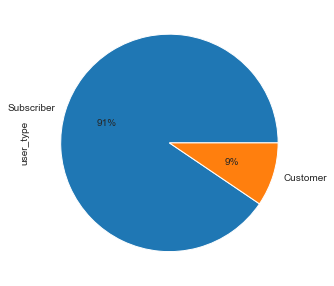

In [27]:
# make a count for each user_type column
user_count = bike_clean.user_type.value_counts()

# plot a pie chart
user_count.plot(kind = 'pie', figsize = (10,5), y='user_count', autopct='%1.0f%%')
plt.show()

There are over 90% subscriber user types.

Next up, bike_share_for_all_trip.

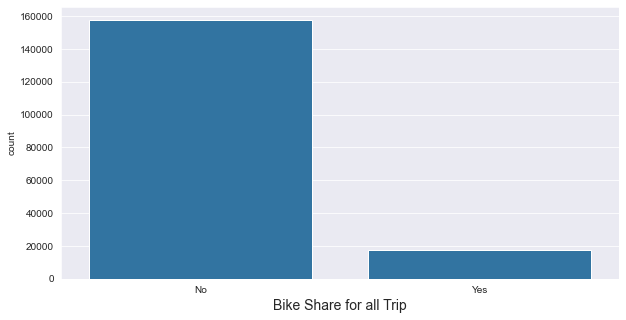

In [28]:
# make a count plot of bike_share_for_all_trip
plt.figure(figsize=[10, 5])
default_color = sb.color_palette()[0]
sb.countplot(data = bike_clean, x = 'bike_share_for_all_trip', color = default_color)
plt.xlabel('Bike Share for all Trip', fontsize = 14)
plt.show();

Most riders did not use bike share for all trips.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Because the duration had a wide range of values, I examined the data with a log transform. The data was symmetric and unimodal after the transformation, with a peak between 8 and 12. This revealed that the majority of rides lasted between 8 and 12 minutes.
> The start day and start hour visualizations show that the majority of rides take place during work days (Monday-Friday) between 7am and 7pm.
> The visualizations of member gender, user type, and bike share for all trips show that a majority of riders were male subscribers who did not use bike share for all trip.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> When exploring the start time variable, I needed to extract the date, day, and hour for easier and more visually appealing plots.

## Bivariate Exploration

**How does the trip duration vary with user type?**

In [29]:
def histplot(col_name):
    # log transformation
    log_binsize = 0.1
    bins = 10 ** np.arange(0.0, np.log10(bike_clean['duration_min'].max())+log_binsize, log_binsize)

    # Plot the Seaborn's FacetGrid
    g = sb.FacetGrid(data = bike_clean, col = col_name,  height=4, aspect = 1, sharey=False)
    g.map(plt.hist, "duration_min", bins = bins)
    plt.xscale('log')
    plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]);

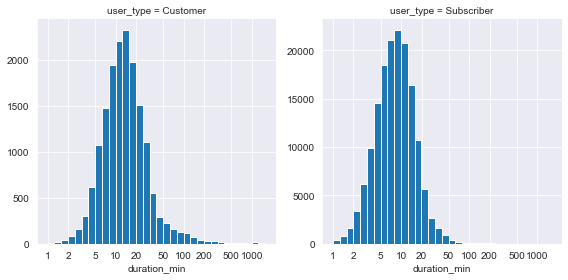

In [30]:
histplot('user_type')

From the above plot, the customer has it's peak at 15 minutes while subscriber has it's peak at 10 minutes. This shows that most customers rode bikes within 15 minutes while most subscribers rode bikes within 10 minutes. Customers were also more likely to ride longer than one hour when compared to subscriber users.

**How does the trip duration vary with gender?**

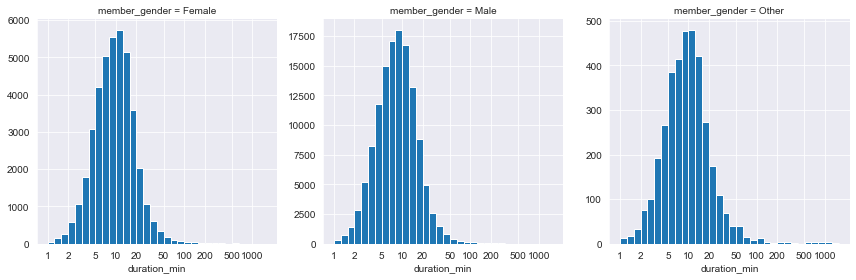

In [31]:
histplot('member_gender')

From the above plot, most female rides was between 10 - 15 minutes, while most male rides was between 8 - 10 minutes. This shows that female bikers ride for longer duration compared to male bikers.

**What day had the longest ride?**

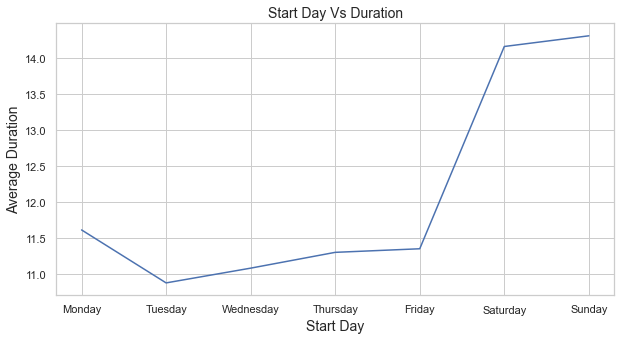

In [33]:
# group the start_day and find the average duration_min
long_ride = bike_clean.groupby('start_day')['duration_min'].mean()

# make a plot of the start_day and the Average duration_min
long_ride.plot()

# set the figure size and style
sb.set(rc={'figure.figsize':(10,5)})
sb.set_style("whitegrid")

# setup the axis and title label
plt.title("Start Day Vs Duration", fontsize = 14)
plt.xlabel("Start Day", fontsize = 14)
plt.ylabel("Average Duration", fontsize = 14)
plt.show()

Weekend rides (Saturday and Sunday) lasted longer on average than other days.

**Customers' and subscribers' daily usage**

In [34]:
def usage_plot(col_name):
    plt.figure(figsize=[10, 5])
    sb.countplot(data = bike_clean, x = col_name, hue = 'user_type')
    plt.xlabel(col_name, fontsize = 14)
    plt.show();

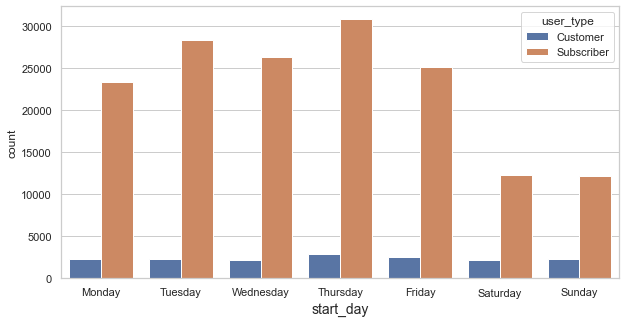

In [35]:
usage_plot('start_day')

On daily usage, there was far more subscriber usage than customers. The drop in volume for subscribers on weekends indicates that they primarily ride bikes for work commutes during the week.

**Customers' and subscribers' hourly usage**

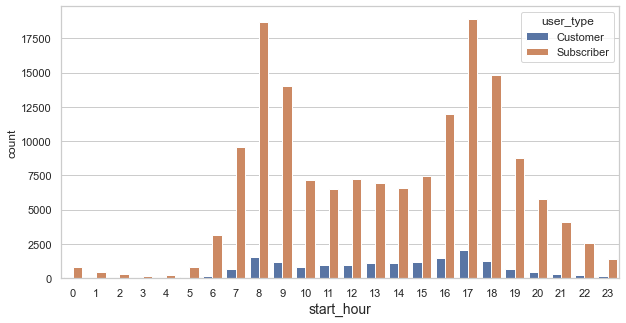

In [36]:
usage_plot('start_hour')

Subscriber usage peaks during typical rush hours when people are leaving for work in the morning and returning home in the afternoon, confirming their usage purpose and goal of riding. A similar pattern was not observed among customers who ride most frequently in the afternoon or early evening for a different reason than subscriber riders.

**Daily usage by gender**

In [37]:
def gender_plot(col_name):
    plt.figure(figsize=[10, 5])
    sb.countplot(data = bike_clean, x = col_name, hue = 'member_gender')
    plt.xlabel(col_name, fontsize = 14)
    plt.show();

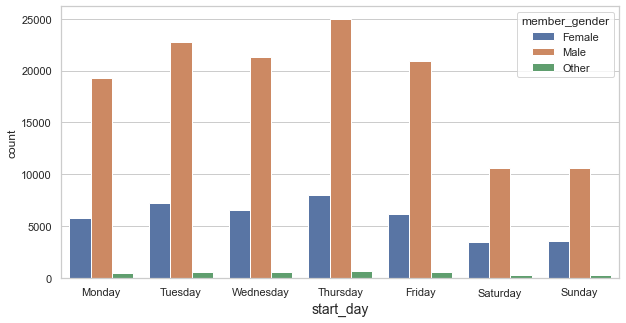

In [38]:
gender_plot('start_day')

On daily usage, we see that both male and female bikers show a similar trend with Thursday having the most bikers for both gender.

**Hourly usage by gender**

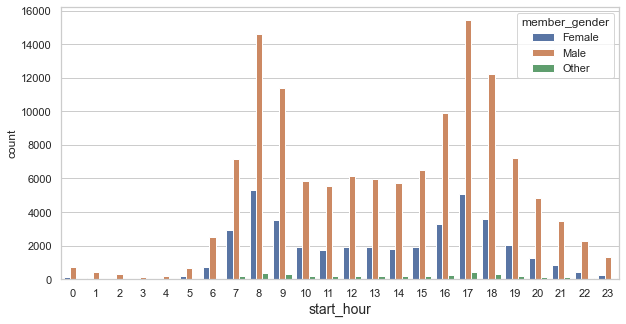

In [39]:
gender_plot('start_hour')

On an hourly basis, the majority of male rides take place at 5 p.m., while the majority of female rides take place at 8 a.m.

**User Type vs Member Gender**

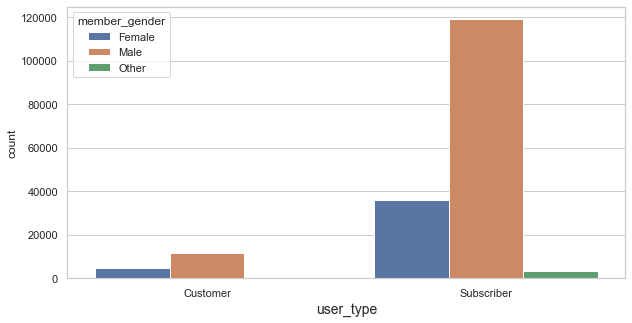

In [40]:
gender_plot('user_type')

The majority of customer bikers are male, and the majority of subscriber bikers are also male

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> + The main variable of interest is duration. Customers rode bikes within 15 minutes while subscribers rode bikes within 10 minutes. Customers were also seen to ride longer than 1 hour when compared to subscribers.
> + Female riders lasted longer on average (10-15 min) compared to male riders (8-10 min).
> + Weekend rides lasted longer than other days.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> + Subscribers ride bikes far more than customers and subscribers primarily ride bikes for work.
> + Both customer and subscriber riders have more males than females.
> + The majority of male rides take place at 5 p.m., while the majority of female rides take place at 8 a.m.

## Multivariate Exploration
In this section of the analysis, I'd like to look at how the user type, member gender, start day, and start hour affect the relationship with duration (our main variable of interest).

**How does the average trip duration differ between customers and subscribers in terms of days?**

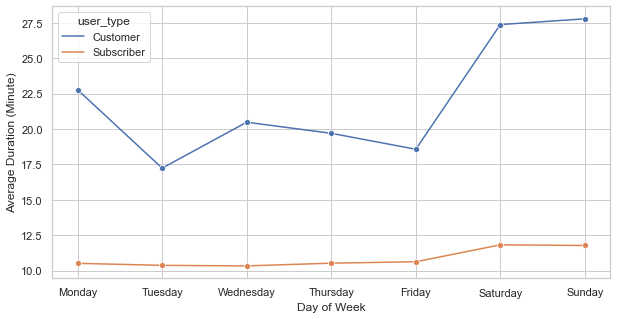

In [41]:
# group by user_type and start_day and find the average duration_min
avg_duration_user_days = bike_clean.groupby(['user_type','start_day'])['duration_min'].mean()
avg_duration_user_days = avg_duration_user_days.reset_index()

# make a line plot
sb.lineplot(data=avg_duration_user_days, x='start_day', y='duration_min', hue='user_type', marker='o');
plt.xlabel('Day of Week');
plt.ylabel('Average Duration (Minute)');

The above plot shows that subscribers ride much shorter trips than customers on each day of the week. Both user types have an increase in trip duration over weekends. Subscribers appear to be more efficient than customers overall, with a very consistent average duration from Monday to Friday.

**How does the average trip duration differ between customers and subscribers in terms of hours?**

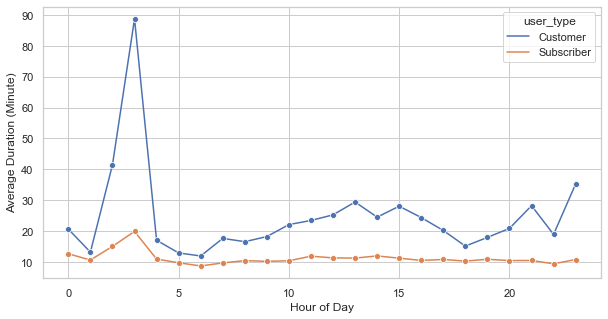

In [42]:
# group by user_type and start_hour and find the average duration_min
avg_duration_user_hours = bike_clean.groupby(['user_type','start_hour'])['duration_min'].mean()
avg_duration_user_hours = avg_duration_user_hours.reset_index()

# make a line plot
sb.lineplot(data=avg_duration_user_hours, x='start_hour', y='duration_min', hue='user_type', marker='o');
plt.xlabel('Hour of Day');
plt.ylabel('Average Duration (Minute)');

Both customers and subscribers are seen to have the longest rides between 2-3 hours. Subscribers have a more consistent average duration than customers.

**How does the average trip duration differ between gender in terms of days?**

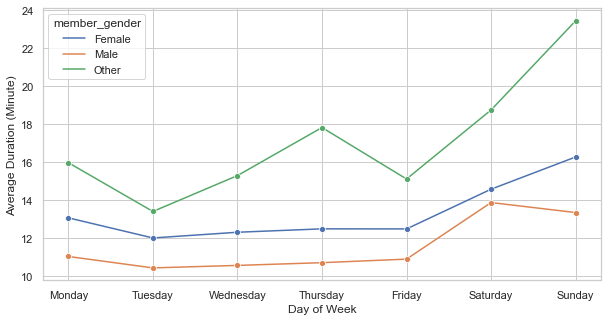

In [43]:
# group by member_gender and start_day and find the average duration_min
avg_duration_gender_days = bike_clean.groupby(['member_gender','start_day'])['duration_min'].mean()
avg_duration_gender_days = avg_duration_gender_days.reset_index()

# make a line plot
sb.lineplot(data=avg_duration_gender_days, x='start_day', y='duration_min', hue='member_gender', marker='o');
plt.xlabel('Day of Week');
plt.ylabel('Average Duration (Minute)');

Male riders are seen to have a shorter duration than female rides all through the week. The other gender is seen to have an extremely long duration of ride over the weekend.

**How does the average trip duration differ between gender in terms of hours?**

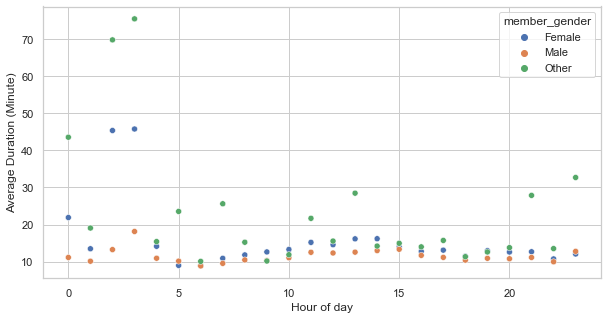

In [44]:
# group by member_gender and start_hour and find the average duration_min
avg_duration_gender_hours = bike_clean.groupby(['member_gender','start_hour'])['duration_min'].mean()
avg_duration_gender_hours = avg_duration_gender_hours.reset_index()

# make a scatter plot
sb.scatterplot(data=avg_duration_gender_hours, x='start_hour', y='duration_min', hue='member_gender');
plt.xlabel('Hour of day');
plt.ylabel('Average Duration (Minute)');

Over the hours, male riders are seen to have the shortest trip duration.

**How does the average trip duration differ between gender and user in terms of days?**

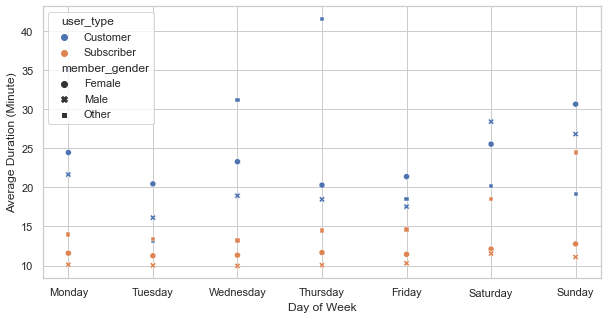

In [45]:
# group by member_gender, user_type and start_day and find the average duration_min
avg_gender_user_days = bike_clean.groupby(['member_gender','user_type','start_day'])['duration_min'].mean()
avg_gender_user_days = avg_gender_user_days.reset_index()

# make a scatter plot
sb.scatterplot(data=avg_gender_user_days, x='start_day', y='duration_min', style='member_gender', hue = 'user_type');
plt.xlabel('Day of Week');
plt.ylabel('Average Duration (Minute)');

Male subscribers have the shortest average duration of bike trips across the week days, while female customer bikers have the longest average duration of bike trips across the week days.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The multivariate exploration reinforced some of the patterns discovered in the previous bivariate and univariate explorations, and the relationship between the multiple variables plotted is visualized and information is presented together. Subscribers' efficient/short usage period corresponds to their high concentration on rush hours Monday through Friday, indicating that the use is primarily for work commute. The more relaxed and flexible pattern of customer use indicates that they use the bike sharing system quite differently than subscribers, primarily on weekends and in the afternoon, for city tours or leisure purposes.

### Were there any interesting or surprising interactions between features?

> The interactions between features all complement each other and make sense when viewed together; there is no major surprise observed. The difference in usage habits between male and female is not significant or obvious throughout the investigation, which could be attributed to the imbalanced number of female riders/records compared to male ones. It would be interesting to see how male and female users of the system use the system differently if there was more female data.

## Conclusions
> The main variable of interest is duration, and the visualizations above can be used to draw the following conclusions:
> + Majority of rides lasted between 8 - 12 minutes.
> + Majority of rides take place during work days (Mon - Fri) between 7am and 7pm.
> + Majority of riders were male subscribers who did not use bike share for all trip.
> + Customers rode bikes for a longer duration compared to subscribers.
> + Female customer bikers have the longest average duration of bike trips across the week days.
> + Bike trips taken during the weekend were the longest.

> The following steps were taken during the data exploration:
> + When exploring the start time variable, I needed to extract the date, day, and hour for easier and more visually appealing plots.
> + I converted the duration_sec column to minutes for better analysis.

In [46]:
# save bike_clean to a csv file
bike_clean.to_csv('Ford_GoBike_clean.csv', index=False)